In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel(r'traindata.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [10]:
data=train_data.copy()

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def change_into_daytime(col):
    data[col]=pd.to_datetime(data[col])
    

In [14]:
for col in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_daytime(col)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [17]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [18]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-19 05:50:00,2023-09-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-19 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-19 18:05:00,2023-09-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-19 16:50:00,2023-09-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [20]:
def extract_hour_minute(col):
    data[col+'_hour']=data[col].dt.hour
    data[col+'_minute']=data[col].dt.minute

In [21]:
extract_hour_minute('Dep_Time')

In [22]:
extract_hour_minute('Arrival_Time')

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-19 05:50:00,2023-09-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-19 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-19 18:05:00,2023-09-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-19 16:50:00,2023-09-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [24]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [25]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [26]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [27]:
def flight_dept_time(x):
    if(x>4 and x<=8):
        return 'Early morning'
    elif(x>8 and x<=12):
        return 'Morning'
    elif (x>12 and x<=16):
        return 'Afternoon'
    elif (x>16 and x<=20):
        return 'Evening'
    elif(x>20 and x<=24):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

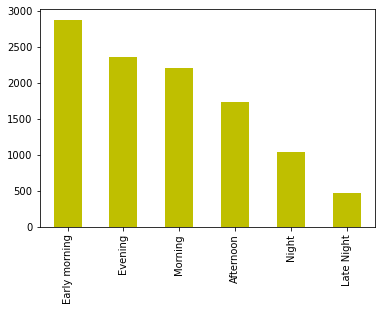

In [28]:
data['Dep_Time_hour'].apply(flight_dept_time).value_counts().plot(kind='bar',color='y')

In [29]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
data['Dep_Time_hour'].apply(flight_dept_time).value_counts().iplot(kind='bar')

In [31]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [32]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return x
        

In [33]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [34]:
int(data['Duration'][2].split(' ')[0][0:-1])

19

In [35]:
data['Duration_hour']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [36]:
data['Duration_minute']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [37]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [38]:
def total_minutes(x,y):
    return data[x]*60+data[y]

In [39]:
data['Duration_total_mins']=total_minutes('Duration_hour','Duration_minute')

In [40]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

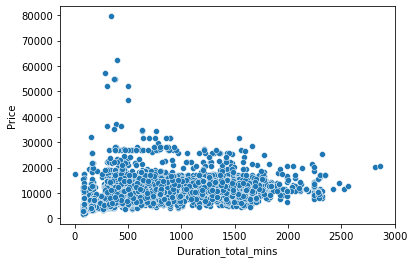

In [41]:
sns.scatterplot(x='Duration_total_mins',y='Price',data=data)

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

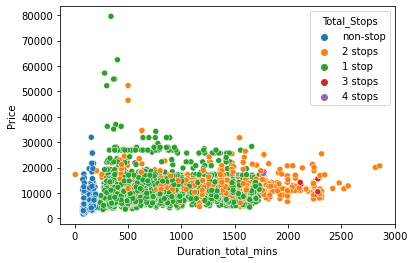

In [42]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue='Total_Stops',data=data)

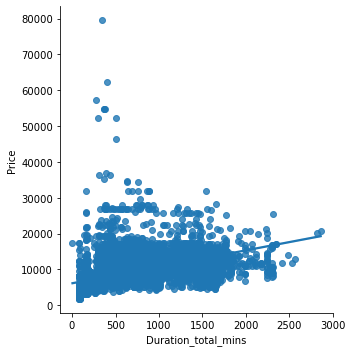

In [43]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [44]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

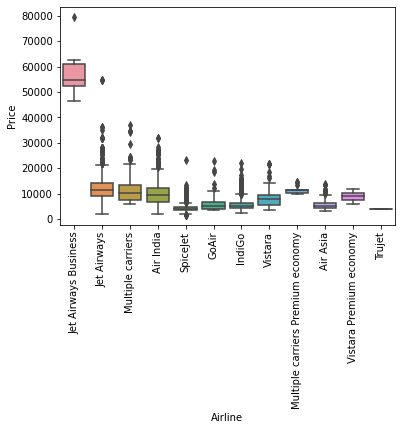

In [45]:
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [46]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [47]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [48]:
data['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [49]:
data.groupby('Source')['Price'].mean().sort_values()

Source
Chennai      4789.892388
Mumbai       5059.708752
Banglore     8017.464269
Kolkata      9158.389411
Delhi       10540.113536
Name: Price, dtype: float64

In [50]:
source=data.groupby('Source')['Price'].mean().sort_values().index

In [51]:
dict_source={key:index for index,key in enumerate(source,0)}


In [52]:
data['Source']=data['Source'].map(dict_source)

In [53]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,2,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,3,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,4,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,3,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,2,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [54]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [55]:
data.groupby('Airline')['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [56]:
airlines=data.groupby('Airline')['Price'].mean().sort_values().index

In [57]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [58]:
data['Airline']=data['Airline'].map(dict_airlines)

In [59]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [60]:
data['Destination'].replace('New Delhi', 'Delhi',inplace=True)

In [61]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [62]:
destinations=data.groupby('Destination')['Price'].mean().sort_values().index

In [63]:
dict_dist={key:index for index,key in enumerate(destinations,0)}

In [64]:
data['Destination']=data['Destination'].map(dict_dist)

In [65]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,3,2019-03-24,2,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,7,2019-01-05,3,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,10,2019-09-06,4,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,3,2019-12-05,3,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,3,2019-01-03,2,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [66]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [67]:
def label_encoding(x):
    if x=='non-stop':
        return 0
    elif x=='1 stop':
        return 1
    elif x=='2 stops':
        return 2
    elif x=='3 stops':
        return 3
    else:
        return 4

In [68]:
data['Total_Stops']=data['Total_Stops'].apply(label_encoding)

In [69]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,3,2019-03-24,2,2,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,7,2019-01-05,3,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,10,2019-09-06,4,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,3,2019-12-05,3,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,3,2019-01-03,2,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,1,2019,16,50,21,35,4,45,285


In [70]:
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [71]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

In [72]:
data.drop(columns=['Date_of_Journey','Route','Duration','Additional_Info','Journey_year','Duration_hour','Duration_minute'],axis=1,inplace=True)

In [73]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins
0,3,2,2,0,3897,24,3,22,20,1,10,170
1,7,3,3,2,7662,5,1,5,50,13,15,445
2,10,4,4,2,13882,6,9,9,25,4,25,1140
3,3,3,3,1,6218,5,12,18,5,23,30,325
4,3,2,2,1,13302,3,1,16,50,21,35,285


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price'>

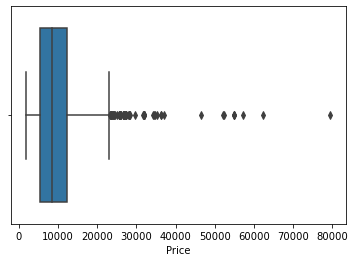

In [74]:
sns.boxplot(data['Price'])

In [75]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
maximum= q3+1.5*iqr
minimum=q1-1.5*iqr


In [76]:
print([price for price in data['Price'] if price> maximum or price <minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [77]:
len([price for price in data['Price'] if price> maximum or price <minimum])

94

In [78]:
data['Price']=np.where(data['Price']>30000,data['Price'].median(),data['Price'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Price'>

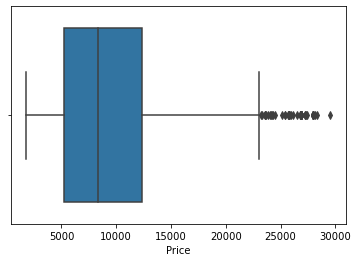

In [79]:
sns.boxplot(data['Price'])

In [80]:
X=data.drop(['Price'],axis=1)
y=data['Price']

In [81]:
from sklearn.feature_selection import mutual_info_regression

In [82]:
imp=mutual_info_regression(X,y)

In [83]:
imp_df=pd.DataFrame(imp,index=X.columns,columns=['importance'])

In [84]:
imp_df

,importance
Airline,0.974532
Source,0.998921
Destination,1.001609
Total_Stops,0.785400
Journey_day,0.194157
Journey_month,0.232137
Dep_Time_hour,0.345236
Dep_Time_minute,0.257879
Arrival_Time_hour,0.393544
Arrival_Time_minute,0.350741


In [85]:
imp_df.sort_values(by='importance',ascending=False)

,importance
Destination,1.001609
Source,0.998921
Airline,0.974532
Total_Stops,0.785400
Duration_total_mins,0.509561
Arrival_Time_hour,0.393544
Arrival_Time_minute,0.350741
Dep_Time_hour,0.345236
Dep_Time_minute,0.257879
Journey_month,0.232137


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [93]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score :{}'.format(model.score(X_train,y_train)))
    y_pred=model.predict(X_test)
    print('Prediction are :{}'.format(y_pred))
    print('r2_score :{}'.format(metrics.r2_score(y_test,y_pred)))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_pred)))
    print('MSE :{}'.format(metrics.mean_squared_error(y_test,y_pred)))
    print('MAPE :{}'.format(mape(y_test,y_pred)))
    sns.distplot(y_test-y_pred)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
from sklearn import metrics

Training score :0.9495838599940186
Prediction are :[16730.66  5869.61  8702.08 ...  3564.96  6529.62  7339.83]
r2_score :0.8139434743625408
MAE: 1175.322853813581
MSE :3468878.0845706672
MAPE :13.261842055224554


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



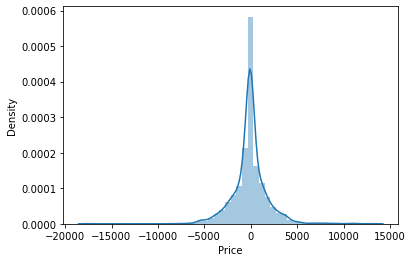

In [96]:
predict(RandomForestRegressor())